# HDMA Washington State Data

About the data: The Home Mortgage Disclosure Act (HMDA) requires many financial institutions to maintain, report, and publicly disclose information about mortgages. These public data are important because they help show whether lenders are serving the housing needs of their communities; they give public officials information that helps them make decisions and policies; and they shed light on lending patterns that could be discriminatory.

Kaggle source: https://www.kaggle.com/miker400/washington-state-home-mortgage-hdma2016

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import pytz
import os
import scipy.stats as stat
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
data = pd.read_csv("Washington_State_HDMA-2016.csv.zip", low_memory=False)

In [5]:
data.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [7]:
data.shape

(466566, 47)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466566 entries, 0 to 466565
Data columns (total 47 columns):
tract_to_msamd_income             465951 non-null float64
rate_spread                       8638 non-null float64
population                        465956 non-null float64
minority_population               465956 non-null float64
number_of_owner_occupied_units    465944 non-null float64
number_of_1_to_4_family_units     465955 non-null float64
loan_amount_000s                  466566 non-null int64
hud_median_family_income          465960 non-null float64
applicant_income_000s             404533 non-null float64
state_name                        466566 non-null object
state_abbr                        466566 non-null object
sequence_number                   466566 non-null int64
respondent_id                     466566 non-null object
purchaser_type_name               466566 non-null object
property_type_name                466566 non-null object
preapproval_name              

In [9]:
data.action_taken_name.unique()

array(['Loan originated', 'Application approved but not accepted',
       'Application denied by financial institution',
       'Application withdrawn by applicant',
       'File closed for incompleteness',
       'Loan purchased by the institution',
       'Preapproval request denied by financial institution',
       'Preapproval request approved but not accepted'], dtype=object)

In [10]:
df = data.loc[(data.action_taken_name.str.contains('Loan originated'))
              | (data.action_taken_name.str.contains('Application denied by financial institution')) ]

## Visualizing missing data

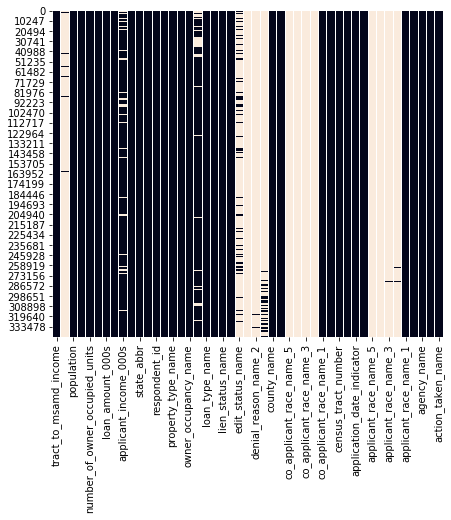

In [30]:
plt.figure(figsize=(7,6))
sns.heatmap(df.isnull(), cbar=False)

In [35]:
df.edit_status_name.isnull().value_counts()

True     271594
False     56295
Name: edit_status_name, dtype: int64

In [41]:
removal_cols = df[['rate_spread','edit_status_name','denial_reason_name_2','co_applicant_race_name_5','co_applicant_race_name_4',
                  'co_applicant_race_name_3','co_applicant_race_name_2','applicant_race_name_5','applicant_race_name_4',
                  'applicant_race_name_3','applicant_race_name_2', 'denial_reason_name_1','denial_reason_name_3']]

In [146]:
df2=df.drop(columns=removal_cols)

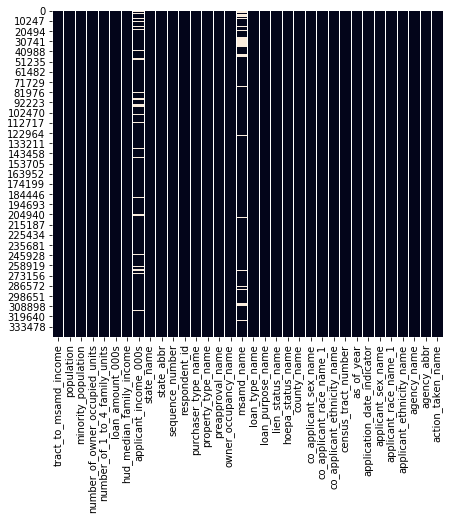

In [147]:
plt.figure(figsize=(7,6))
sns.heatmap(df2.isnull(), cbar=False)

Rather than dropping the remaining columns that are missing, we will impute the missing values to preserve the observation

In [148]:
df2.loc[pd.isnull(df2).any(1)==True] #50,0444 observations have some missing value
null_test = df2.copy()
null_test.loc[(pd.isnull(null_test).any(1)==True)] # do these observations have something systematically similar about them?

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,state_abbr,...,co_applicant_ethnicity_name,census_tract_number,as_of_year,application_date_indicator,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
5,119.629997,4775.0,18.889999,954.0,1332.0,206,72300.0,NaN,Washington,WA,...,No co-applicant,734.06,2016,0,Male,White,Not Hispanic or Latino,Office of the Comptroller of the Currency,OCC,Loan originated
6,103.209999,4745.0,33.070000,1337.0,1442.0,356,90300.0,NaN,Washington,WA,...,No co-applicant,519.23,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
7,93.769997,7451.0,33.400002,1761.0,2478.0,265,72300.0,NaN,Washington,WA,...,Not Hispanic or Latino,731.08,2016,0,Male,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
8,109.580002,6567.0,21.709999,1130.0,1579.0,131,73600.0,NaN,Washington,WA,...,No co-applicant,109.10,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
26,87.199997,5808.0,28.150000,1765.0,2321.0,123,65800.0,NaN,Washington,WA,...,No co-applicant,119.00,2016,0,Male,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
31,59.689999,1686.0,33.930000,177.0,478.0,191,90300.0,NaN,Washington,WA,...,Hispanic or Latino,305.01,2016,0,Male,White,Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
32,109.730003,5035.0,18.830000,1249.0,1567.0,277,73300.0,NaN,Washington,WA,...,No co-applicant,408.03,2016,0,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,CFPB,Loan originated
36,99.269997,6786.0,35.340000,1679.0,1978.0,99,65800.0,NaN,Washington,WA,...,Not Hispanic or Latino,206.05,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
38,94.080002,5941.0,25.750000,1019.0,1855.0,228,73300.0,NaN,Washington,WA,...,No co-applicant,413.20,2016,0,Male,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
47,112.559998,4333.0,16.570000,1207.0,1506.0,289,73300.0,NaN,Washington,WA,...,No co-applicant,404.12,2016,0,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,CFPB,Loan originated


In [149]:
df2.loc[df2.msamd_name.isnull()].applicant_income_000s.isnull().value_counts(normalize=True) #msamd_name represents a metro division/area where the property is located in. 
# both msamd name and applicant income are missing 8% of the time. 

False    0.910565
True     0.089435
Name: applicant_income_000s, dtype: float64

In [150]:
df2.loc[(df2.applicant_income_000s.isnull())
       & (df2.msamd_name.isnull())] # appears as though half the time one is missing, so is the other... do these move together?

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,state_abbr,...,co_applicant_ethnicity_name,census_tract_number,as_of_year,application_date_indicator,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
116,94.029999,3303.0,10.020000,1028.0,1409.0,186,55600.0,NaN,Washington,WA,...,No co-applicant,9712.00,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
420,99.480003,2901.0,18.170000,935.0,1510.0,391,55600.0,NaN,Washington,WA,...,"Information not provided by applicant in mail,...",9604.00,2016,0,Male,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
500,86.660004,9912.0,39.060001,2176.0,3416.0,118,55600.0,NaN,Washington,WA,...,No co-applicant,109.02,2016,0,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
556,106.550003,2694.0,10.130000,706.0,1492.0,113,55600.0,NaN,Washington,WA,...,"Information not provided by applicant in mail,...",9701.00,2016,0,Male,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
575,135.029999,4359.0,7.480000,1513.0,1945.0,208,55600.0,NaN,Washington,WA,...,No co-applicant,9753.00,2016,0,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
585,106.339996,2825.0,72.389999,810.0,1439.0,117,55600.0,NaN,Washington,WA,...,Not Hispanic or Latino,9401.00,2016,0,Male,American Indian or Alaska Native,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
665,93.139999,8040.0,20.920000,1946.0,2741.0,67,55600.0,NaN,Washington,WA,...,No co-applicant,104.00,2016,0,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
685,86.660004,9912.0,39.060001,2176.0,3416.0,128,55600.0,NaN,Washington,WA,...,No co-applicant,109.02,2016,0,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
886,65.330002,6848.0,76.309998,1116.0,1881.0,196,55600.0,NaN,Washington,WA,...,No co-applicant,106.00,2016,0,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,CFPB,Loan originated
891,111.029999,4109.0,14.210000,898.0,1342.0,135,55600.0,NaN,Washington,WA,...,No co-applicant,9708.00,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated


In [151]:
df2['missing_income'] = np.where((~df2.msamd_name.isnull()) & (df2.applicant_income_000s.isnull()),1,0)
df2['missing_msamd'] = np.where((~df2.applicant_income_000s.isnull()) & (df2.msamd_name.isnull()),1,0)
df2['missing_both'] = np.where((df2.msamd_name.isnull()) & (df2.applicant_income_000s.isnull()),1,0)

In [152]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327889 entries, 0 to 364323
Data columns (total 37 columns):
tract_to_msamd_income             327656 non-null float64
population                        327659 non-null float64
minority_population               327659 non-null float64
number_of_owner_occupied_units    327654 non-null float64
number_of_1_to_4_family_units     327658 non-null float64
loan_amount_000s                  327889 non-null int64
hud_median_family_income          327661 non-null float64
applicant_income_000s             301382 non-null float64
state_name                        327889 non-null object
state_abbr                        327889 non-null object
sequence_number                   327889 non-null int64
respondent_id                     327889 non-null object
purchaser_type_name               327889 non-null object
property_type_name                327889 non-null object
preapproval_name                  327889 non-null object
owner_occupancy_name         

In [153]:
pairs = df2[['action_taken_name','loan_amount_000s','hud_median_family_income','number_of_1_to_4_family_units',
            'number_of_owner_occupied_units','minority_population','population','tract_to_msamd_income','missing_income',
            'missing_msamd','missing_both']]
#sns.pairplot(pairs, hue='missing_income')

While some loose interpretations can be drawn from this, reasons for missing income, missing msamd, or missing both don't appear to be strongly related to any single other variable.
Cool to note: 
- normal distributions in tract to msamd income, population, number of owner occupied units, and number of 1-4 family units
- hud median family income appears bucketed at interval levels of income, with noticeable observations occurring in high-income areas ($90,000/household)


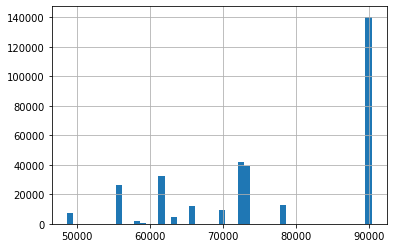

In [154]:
df2.hud_median_family_income.hist(bins=50)

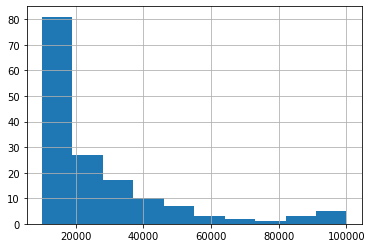

In [160]:
df2.loc[df2.loan_amount_000s > 10000].loan_amount_000s.hist() #were these 156 entries with loan amounts over 10,000,000 miscodings? Or real loan amounts? How to best handle them? 

In [161]:
df2.loc[df2.loan_amount_000s > 10000].applicant_income_000s.describe() # the incomes for these individuals seem very typical. This is used as justification to replace these 156 values with the median loan amount

count       9.000000
mean      455.000000
std       848.268236
min        24.000000
25%        59.000000
50%        85.000000
75%       228.000000
max      2629.000000
Name: applicant_income_000s, dtype: float64

In [169]:
median = df2.loc[df2.loan_amount_000s < 10000].loan_amount_000s.median()

In [173]:
df2['loan_amount_000s'] = np.where(df2.loan_amount_000s >= 10000, median, df2['loan_amount_000s']) #replacing outliers with the median loan amount for the dataest

In [174]:
df2.loan_amount_000s.describe()

count    327889.000000
mean        288.929833
std         263.172755
min           1.000000
25%         172.000000
50%         248.000000
75%         350.000000
max        9951.000000
Name: loan_amount_000s, dtype: float64

## Filling in Missing Values using Random Forest